# Regresión Logística (5-CrossValidation) 1787 observaciones solamente ejercicio.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [8]:
# Load the dataset
datos = pd.read_csv('C:/Users/noeam/Documents/git/github/proyecto_pt2/outputs/fmed_seleccionadas.csv')
datos.describe()

# Split the dataset into features (X) and target variable (y)
X = datos[['ejer_act', 'ejer_1', 'ejer_5', 'suenio_act', 'suenio_1', 'suenio_5']]
y = datos['obesidad']

# Perform one-hot encoding on the categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X).toarray()

# Perform K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
fprs = []
tprs = []

j = 0
for train_index, test_index in kf.split(X_encoded):
    # Split the data into training and testing sets for each fold
    X_train, X_test = X_encoded[train_index], X_encoded[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=0.25, alpha=0.25, label=f"ROC fold %d (AUC=%0.3f)" % (j + 1, roc_auc))
    j = j + 1

# Compute average evaluation metrics
average_accuracy = sum(accuracy_scores) / k
average_precision = sum(precision_scores) / k
average_recall = sum(recall_scores) / k
average_f1 = sum(f1_scores) / k
average_roc_auc = sum(roc_auc_scores) / k

# Plot average ROC curve
mean_fpr = sum(fprs) / k
mean_tpr = sum(tprs) / k
plt.plot(mean_fpr, mean_tpr, label='Mean ROC (AUC=%0.3f)' % (average_roc_auc), color= 'blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Print the evaluation metrics
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1}")
print(f"Average ROC AUC: {average_roc_auc}")


,obesidad
count,714.000000
mean,0.308123
std,0.462041
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


C:\Users\noeam\.virtualenvs\proyecto_pt2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeam\.virtualenvs\proyecto_pt2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeam\.virtualenvs\proyecto_pt2\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\noeam\.virtualenvs\proyecto_pt2\lib\site-packages\sklearn\met

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

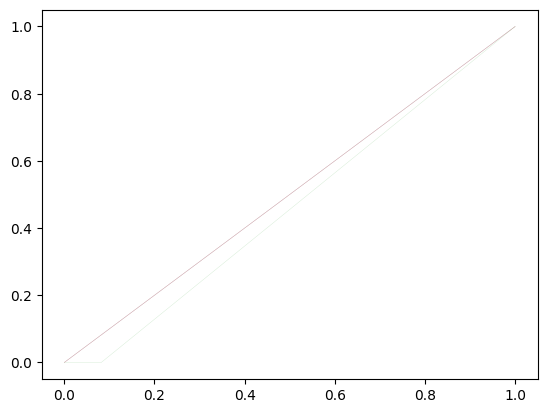

In [11]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load the dataset
datos = pd.read_csv('C:/Users/noeam/Documents/git/github/proyecto_pt2/outputs/fmed_seleccionadas.csv')

# Split the dataset into features (X) and target variable (y)
X = datos[['ejer_act', 'ejer_1', 'ejer_5', 'suenio_act', 'suenio_1', 'suenio_5']]
y = datos['obesidad']

# Perform one-hot encoding on the categorical variables
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X).toarray()

# Set the test size for train-test split
test_size = 0.4  # Percentage for the test set

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=test_size, random_state=42)

# Perform K-fold cross-validation on the training set
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []
fprs = []
tprs = []

j = 0
for train_index, val_index in kf.split(X_train):
    # Split the training set into training and validation sets for each fold
    X_fold_train, X_val = X_train[train_index], X_train[val_index]
    y_fold_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit logistic regression model
    model = LogisticRegression()
    model.fit(X_fold_train, y_fold_train)

    # Predict the target variable for the validation set
    y_pred = model.predict(X_val)

    # Compute evaluation metrics for the validation set
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

    # Compute ROC curve for the validation set
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    fprs.append(fpr)
    tprs.append(tpr)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=0.25, alpha=0.25, label=f"ROC fold %d (AUC=%0.3f)" % (j + 1, roc_auc))
    j = j + 1

# Fit logistic regression model on the entire training set
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred_test = model.predict(X_test)

# Compute evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_pred_test)

# Compute average evaluation metrics
average_accuracy = sum(accuracy_scores) / k
average_precision = sum(precision_scores) / k
average_recall = sum(recall_scores) / k
average_f1 = sum(f1_scores) / k
average_roc_auc = sum(roc_auc_scores) / k

# Plot average ROC curve
mean_fpr = sum(fprs) / k
mean_tpr = sum(tprs) / k
plt.plot(mean_fpr, mean_tpr, label='Mean ROC (AUC=%0.3f)' % (average_roc_auc), color='blue', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Print the evaluation metrics
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1}")
print(f"Average ROC AUC: {average_roc_auc}")

# Print the evaluation metrics for the test set
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)
print("Test ROC AUC Score:", test_roc_auc)